### <center> Simple Linear Regression Example

#### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
data = pd.read_csv('./Salary_dataset.csv',usecols=['YearsExperience','Salary'])
data.head(10)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [3]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.shape

(30, 2)

In [6]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
data.isnull().mean()*100

YearsExperience    0.0
Salary             0.0
dtype: float64

In [8]:
data.duplicated().sum()

0

### Exploratory data analysis

#### Univariate Analysis

#### Histogram

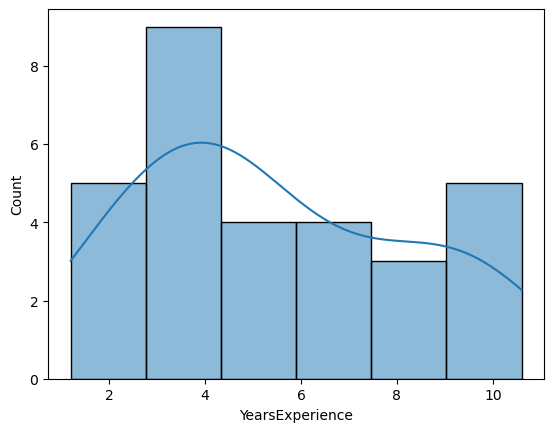

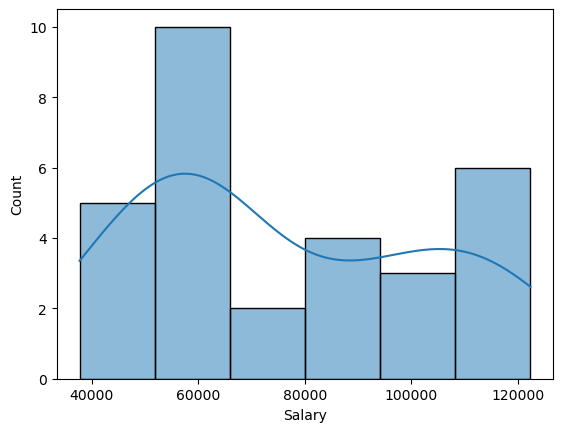

In [9]:
for i in data.columns:
    sns.histplot(x=data[i],kde=True)
    plt.show()

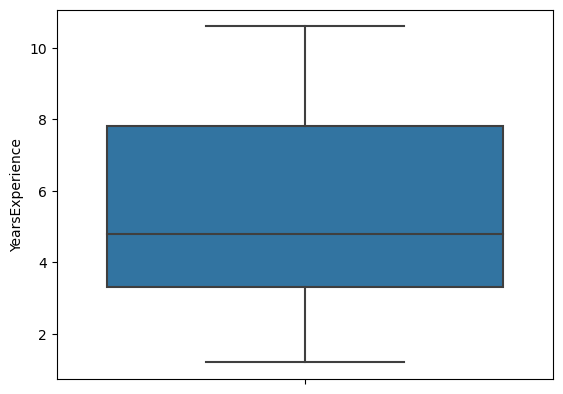

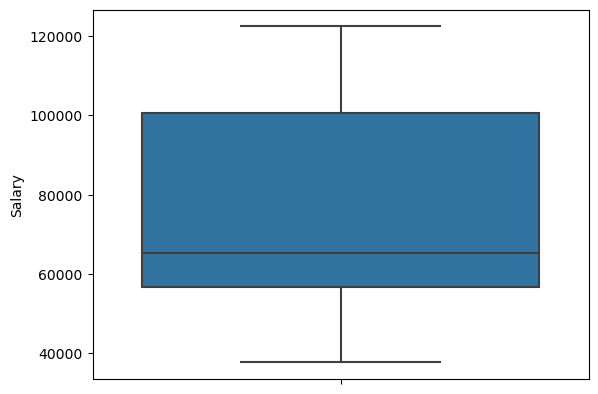

In [10]:
for i in data.columns:
    sns.boxplot(y=data[i])
    plt.show()

#### There are no outliers

#### Multivariate Analysis

#### Scatterplot

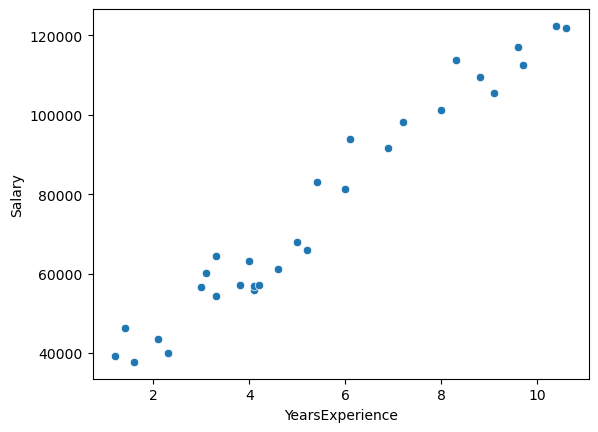

In [11]:
sns.scatterplot(data=data,x='YearsExperience',y='Salary')
plt.show()

#### Heatmap

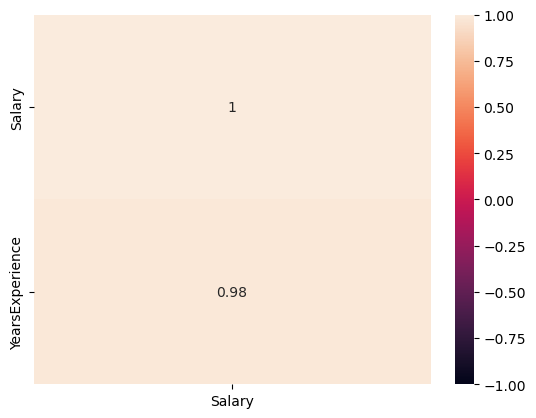

In [12]:
sns.heatmap(data.corr()[['Salary']].sort_values(by='Salary',ascending=False),vmin=-1,vmax=1,annot=True)
plt.show()

#### Selecting features and Targets

In [13]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

#### Feature scaling

#### Initialising Standard Scaler

In [14]:
sc = StandardScaler()

In [15]:
x = sc.fit_transform(x)

#### Splitting the data into training and testing sets

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50,shuffle=True)

#### Model Building

#### Initialising the model

In [17]:
model = LinearRegression()

#### Fitting the model with training data

In [18]:
model.fit(x_train,y_train)

LinearRegression()

#### Predicting using the test data

In [19]:
y_pred = model.predict(x_test)

#### Evaluating the accuracy

In [20]:
r2_score(y_test,y_pred)

0.882467963516984

#### Testing the accuracy

In [21]:
model.score(x_test,y_test)

0.882467963516984

#### Training accuracy

In [22]:
model.score(x_train,y_train)

0.9651985001413793

#### MAE

In [23]:
mean_absolute_error(y_test,y_pred)

5551.677598353315

#### MSE

In [24]:
mean_squared_error(y_test,y_pred)

52522472.85879592

#### Root Mean Squared Error

In [25]:
np.sqrt(mean_squared_error(y_test,y_pred))

7247.2389817637395

#### Creating a dataframe with y_test and y_pred

In [26]:
OUTPUT = pd.DataFrame(zip(y_test,y_pred),columns=['ACTUAL','PREDICTION'])

In [27]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,83089.0,74939.585511
1,64446.0,55035.353794
2,122392.0,122330.613411
3,57190.0,59774.456584
4,81364.0,80626.508859


#### Plotting the result

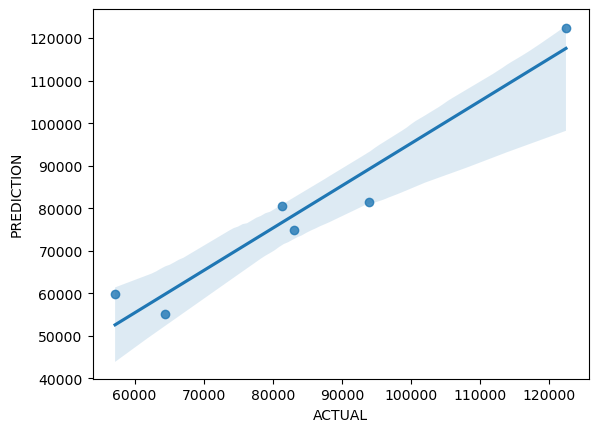

In [28]:
sns.regplot(data=OUTPUT,x='ACTUAL',y='PREDICTION')
plt.show()